In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

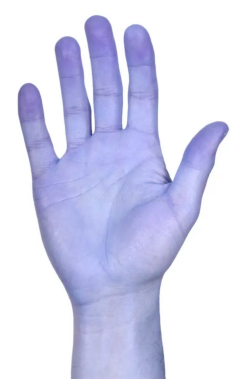

In [2]:
img_path = "img/hand_2.jpg"
img = cv2.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

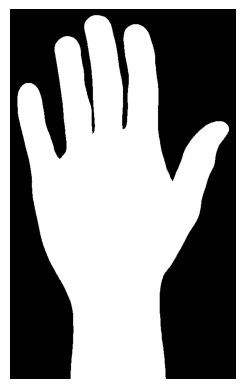

In [3]:
# Thresholding
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((5,5),np.uint8)
thresh = cv2.erode(thresh, kernel, iterations=1)
thresh = cv2.dilate(thresh, kernel, iterations=1)
plt.imshow(thresh.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.show()

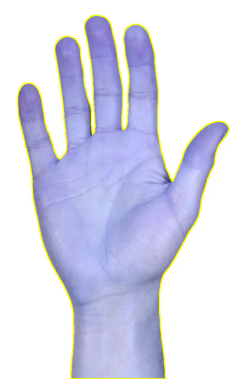

In [4]:
# Contour
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = max(contours, key=lambda x: cv2.contourArea(x))
cv2.drawContours(img, [contours], -1, (255,255,0), 2)
plt.imshow(img)
plt.axis('off')
plt.show()

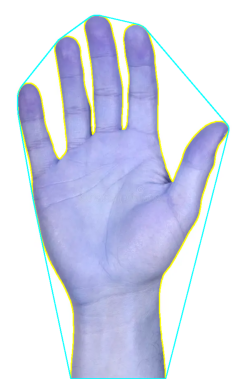

In [5]:
hull = cv2.convexHull(contours)
cv2.drawContours(img, [hull], -1, (0, 255, 255), 2)
plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
hull = cv2.convexHull(contours, returnPoints=False)
defects = cv2.convexityDefects(contours, hull)

In [7]:
if defects is not None:
  keypoint = []
for i in range(defects.shape[0]):
  s, e, f, d = defects[i][0]
  start = tuple(contours[s][0])
  end = tuple(contours[e][0])
  far = tuple(contours[f][0])
  a = np.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
  b = np.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
  c = np.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
  angle = np.arccos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c))
  if angle <= np.pi / 2:
    for each in [start, far, end]:
    #   cv2.circle(img, each, 8, [255, 0, 0], 2)
      keypoint.append([start, far, end])

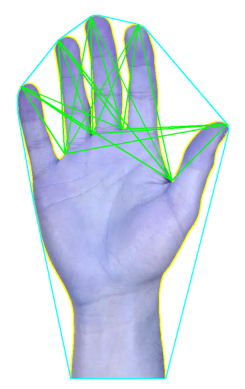

In [8]:
distances = []
j = 1
for i in range(len(keypoint)):
  for j in range(len(keypoint)):
    if i == 3:
      cv2.line(img, keypoint[i][2], keypoint[j][1], (0, 255, 0), 2)
      distances.append(np.sqrt((keypoint[i][2][0] - keypoint[j][1][0]) ** 2 + (keypoint[i][2][1] - keypoint[j][1][1]) ** 2))
    else :
      cv2.line(img, keypoint[i][0], keypoint[j][1], (0, 255, 0), 2)
      distances.append(np.sqrt((keypoint[i][0][0] - keypoint[j][1][0]) ** 2 + (keypoint[i][0][1] - keypoint[j][1][1]) ** 2))

list_of_distance = []
unique_distances = set(distances)
for distance in unique_distances:
  list_of_distance.append(distance)

point_distance = []
for i in range(5):
  point_distance.append(list_of_distance[i:i+4])

plt.imshow(img)
plt.axis('off')
plt.show()